In [9]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import math
import Custom_MSE as funcs
import tqdm

In [10]:
wireplane = 'U'
np.random.seed(42)
path = '../processed_data/current/'

In [11]:
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled, mean, std = funcs.load_data(path, wireplane)

../processed_data/current/x_test_U.npy ../processed_data/current/x_train_U.npy ../processed_data/current/y_test_AE_U.npy ../processed_data/current/y_train_AE_U.npy


In [13]:
y_true_rescaled = []
print('rescalling y_true...')
for i in tqdm.trange(len(y_train_scaled)):
    if sum(y_train_scaled[i]) == 0:
        y_true_rescaled.append(y_train_scaled[i])
    else:
        y_true_rescaled.append((std*y_train_scaled[i]+mean))
y_true_rescaled = np.array(y_true_rescaled)

rescalling y_true...


100%|██████████| 100000/100000 [00:01<00:00, 73293.24it/s]


In [14]:
sig_ranges = []
print('finding ranges where there are signals: ') 
for i in tqdm.trange(len(y_true_rescaled)):
    wave =  y_true_rescaled[i]
    sig_ranges.append(funcs.merge_ranges(wave, 5))
print("finding ranges where there are no signals: ")
no_sig_ranges = funcs.get_non_signal_ranges(sig_ranges)

finding ranges where there are signals: 


100%|██████████| 100000/100000 [00:02<00:00, 41026.74it/s]


finding ranges where there are no signals: 


In [16]:
for i in range(10):
    print('DEBUG MESSAGE: ',sig_ranges[i], '---', no_sig_ranges[i])

DEBUG MESSAGE:  [] --- [[0, 200]]
DEBUG MESSAGE:  [] --- [[0, 200]]
DEBUG MESSAGE:  [] --- [[0, 200]]
DEBUG MESSAGE:  [] --- [[0, 200]]
DEBUG MESSAGE:  [[80, 150]] --- [[0, 80], [150, 200]]
DEBUG MESSAGE:  [] --- [[0, 200]]
DEBUG MESSAGE:  [[35, 61], [86, 99]] --- [[0, 35], [61, 86], [99, 200]]
DEBUG MESSAGE:  [[44, 67]] --- [[0, 44], [67, 200]]
DEBUG MESSAGE:  [] --- [[0, 200]]
DEBUG MESSAGE:  [[16, 143]] --- [[0, 16], [143, 200]]


In [17]:
print(len(y_train_scaled), type(y_train_scaled))
print(len(sig_ranges), type(sig_ranges))

100000 <class 'numpy.ndarray'>
100000 <class 'list'>


In [36]:
lst = y_train_scaled
lst2 = np.array(sig_ranges)

<ipython-input-36-20e3f3dc24df>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lst2 = np.array(sig_ranges)


In [21]:
import pandas as pd

In [26]:
df = pd.DataFrame(list(zip(lst, lst2)),
               columns =['waves', 'ranges'])

In [37]:
y_train_scaled_tensor = tf.convert_to_tensor(y_train_scaled)

In [40]:
type(y_train_scaled_tensor)

tensorflow.python.framework.ops.EagerTensor

In [56]:
input_truth = pd.DataFrame(list(zip(y_train_scaled, sig_ranges)),
    columns =['waves', 'ranges'])

In [69]:
sig_ranges[3:]

[[],
 [[80, 150]],
 [],
 [[35, 61], [86, 99]],
 [[44, 67]],
 [],
 [[16, 143]],
 [],
 [[133, 200]],
 [],
 [],
 [],
 [],
 [[90, 151]],
 [[23, 63]],
 [[128, 185]],
 [],
 [],
 [[0, 98]],
 [[45, 131]],
 [],
 [[36, 38], [111, 139]],
 [],
 [[10, 19], [88, 133], [139, 141]],
 [],
 [[0, 116]],
 [[0, 42]],
 [],
 [[14, 69]],
 [[53, 72]],
 [],
 [[113, 185]],
 [[53, 158]],
 [],
 [[0, 53]],
 [[4, 28], [65, 71]],
 [],
 [],
 [],
 [[104, 162]],
 [[105, 124]],
 [[146, 167]],
 [],
 [],
 [],
 [],
 [[47, 72]],
 [],
 [],
 [[38, 95]],
 [],
 [],
 [[6, 30]],
 [],
 [],
 [[93, 125]],
 [[0, 58]],
 [[65, 111]],
 [],
 [[61, 156]],
 [],
 [],
 [],
 [],
 [[92, 173]],
 [],
 [[16, 98]],
 [],
 [],
 [],
 [],
 [[91, 181]],
 [[26, 56]],
 [[0, 43]],
 [],
 [],
 [[58, 97], [133, 146]],
 [],
 [[94, 108], [114, 151]],
 [],
 [],
 [[0, 47]],
 [],
 [],
 [],
 [[86, 162]],
 [],
 [[63, 183]],
 [[16, 56]],
 [],
 [],
 [[62, 95]],
 [[57, 117]],
 [],
 [[118, 143]],
 [[0, 84]],
 [],
 [],
 [[53, 119]],
 [],
 [[65, 175]],
 [[0, 30]],
 [[26, 

In [64]:
input_truth.head()

,waves,ranges
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[]
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[]
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[]
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[]
4,"[0.020464874393329256, 0.020464874393329256, 0...","[[80, 150]]"


In [66]:
len(input_truth['waves'])

100000

In [63]:
test2 = tf.convert_to_tensor(input_truth, dtype=tf.int32)

ValueError: setting an array element with a sequence.

In [48]:
test

<tf.Tensor: shape=(100000, 0), dtype=float32, numpy=array([], shape=(100000, 0), dtype=float32)>

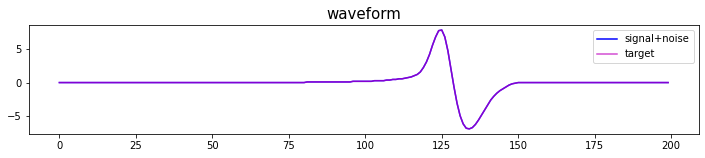

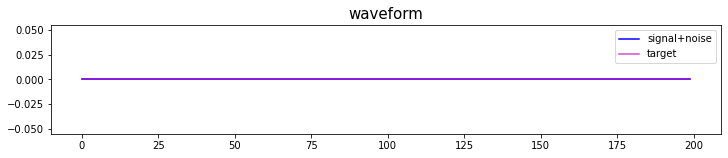

In [27]:
for idx in range(4,6):
    fig, (ax1) = plt.subplots(figsize=(12, 2), facecolor='white')
    ax1.plot(df['waves'][idx],color='blue', label='signal+noise')
    ax1.plot(df['waves'][idx],color='m',alpha=0.7, label='target')
    ax1.set_title("waveform", fontsize=15)
    ax1.legend()

    plt.show()

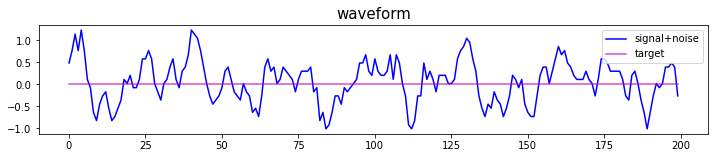

[]


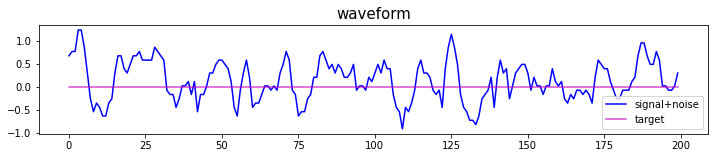

[]


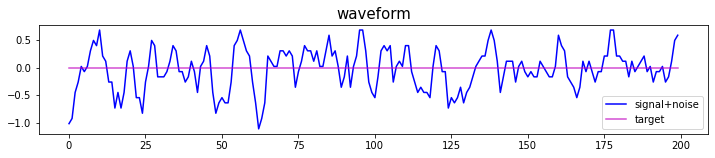

[]


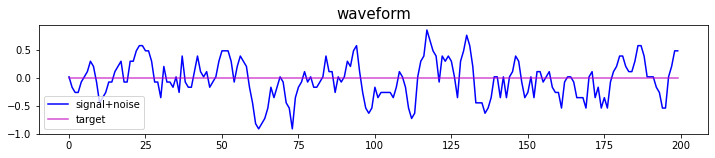

[]


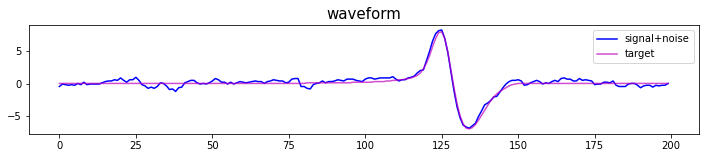

[[80, 150]]


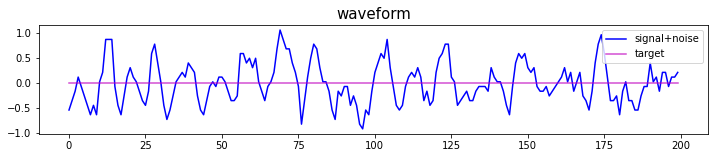

[]


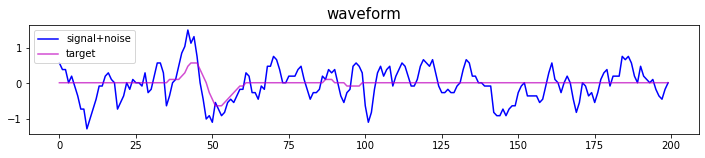

[[35, 61], [86, 99]]


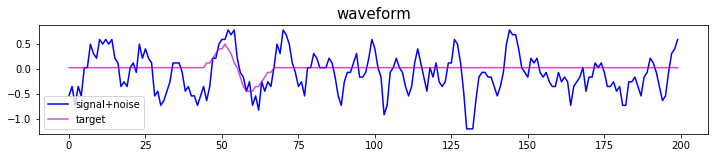

[[44, 67]]


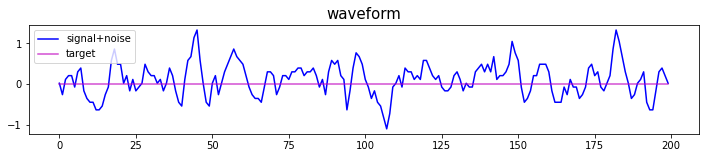

[]


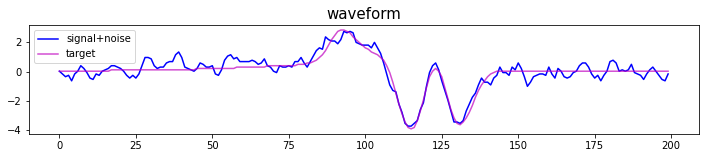

[[16, 143]]


In [33]:
for idx in range(10):
    fig, (ax1) = plt.subplots(figsize=(12, 2), facecolor='white')
    ax1.plot(x_train_scaled[idx],color='blue', label='signal+noise')
    ax1.plot(df['waves'][idx],color='m',alpha=0.7, label='target')
    ax1.set_title("waveform", fontsize=15)
    ax1.legend()

    plt.show()
    print(df['ranges'][idx])